#### Assignment on data manipulation using pandas and numpy

In [1]:
import pandas as pd
import numpy as np

Q1 a) load CSV data

In [ ]:
#Load the CSV file into a DataFrame
df =pd.read_csv('web3_token_transfers.csv')

df.head(5)

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60


Q1 b) Parse the timestamp column as datetime using pd.to_datetime

In [ ]:
# Parses the timestamp column as datetime
df['timestamp']= pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

df['timestamp'].head(5)

0   2024-07-27 03:58:20
1   2024-07-14 03:04:09
2   2024-07-29 07:29:38
3   2024-07-20 06:26:24
4   2024-07-13 23:07:51
Name: timestamp, dtype: datetime64[ns]

Q2 a) basic exploration- show the top 5 and bottom 5 rows

In [ ]:
# gets the first 5 rows in the DataFrame
df.head(5)



,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60


In [ ]:
# gets the last 5 rows in the DataFrame
df.tail(5)

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
995,0x7d321f54337d3b2fe762d2f98cc65a08b33c8167,0x12b225c93d09fbfee50834d34bb976ba2ab744a4,USDC,48.03,2024-07-19 20:23:42,30503,1.63
996,0x99ffd9b436b447f0b75704c666c2e3387468aabc,0xad14eea793cb71aeec4914db1cd51b955768446a,USDC,1246.35,2024-07-06 01:06:21,81703,3.24
997,0xf2476d3a88703c2484581466c841db8ce62c411d,0x8233219c96b703195211f975be60343e130b66a5,WBTC,73.57,2024-07-29 12:05:32,85379,4.28
998,0xb7e4e6b50e93960442a38761471840f4a48cb869,0x199d63a67615ec83d45f91010f6c8206f711b2be,WBTC,1500.25,2024-07-27 03:40:11,78866,9.24
999,0xb21913e7f083654695aeeab90f1510468f1dc41e,0x9bca5940e7d53f22ca22245954f66ece9ab16af8,USDC,295.30,2024-07-21 23:44:32,37905,9.94


Q2 b) Count the number of unique wallets (senders and receivers).


In [ ]:
#count the unique sendaer wallates
unique_senders_count = df['sender_wallet'].nunique()

print(f"Number of unique sender wallets: {unique_senders_count}")

Number of unique sender wallets: 1000


In [13]:
unique_receivers_count = df['receiver_wallet'].nunique()

print(f"Number of receiver wallets: {unique_receivers_count}")

Number of receiver wallets: 1000


Q2 c) Count how many transactions each token has.

In [14]:
#value_counts counts how many time a particular data appears in a column
unique_tokens_tx_count = df['token'].value_counts()

print(f"Number of tx for each token: {unique_tokens_tx_count}")

Number of tx for each token: token
WBTC    214
ETH     203
USDC    200
UNI     194
DAI     189
Name: count, dtype: int64


Q3 wallet analysis - compute total amount sent and received by each wallet

In [15]:
# calls sender_wallet and amount columns, groups by sender_wallet and sums the amount
sender_wallets = df.groupby('sender_wallet')['amount'].sum().reset_index()
# renames the columns for clarity
sender_wallets.columns = ['wallet', 'total_sent']

sender_wallets.head(5)

,wallet,total_sent
0,0x0003c3872d1848ec2011e26ad7571c69370f9fd0,634.78
1,0x0034126c0d51266516fd65d12f3c9a67f04062fa,138.44
2,0x005f673297464a3a9b8657e7f9d1a19e6d62f0f7,26.53
3,0x00906f78509cf901863c7f6980e32877871b784e,452.03
4,0x00fafa59c53d3dd96f5ce0c922ea899710e33c56,136.02


In [16]:
#calls receiver_wallet and amount columns, groups by receiver_wallet and sums the amount
receiver_wallets = df.groupby('receiver_wallet')['amount'].sum().reset_index()
# renames the columns for clarity
receiver_wallets.columns = ['wallet', 'total_received']

receiver_wallets.head(5)


,wallet,total_received
0,0x010ca7452031dca3995f59dcfa5a80446f2e4c03,191.37
1,0x0114a8e880508bfe99f6c996096380067a1c6b7a,2884.04
2,0x0147c9752252629711318f835142d3153726dbea,501.85
3,0x01a4c2ac00ef039936197a9bfa3d1bb99a75d923,60.27
4,0x01a5453728aaf20873b9ac9b236cdb28f08cb285,47.86


In [17]:
# merging both dataframes using a common column 'wallet'
wallets_summary = pd.merge(sender_wallets, receiver_wallets, on= 'wallet', how= 'outer').fillna(0)
wallets_summary.head(5)

,wallet,total_sent,total_received
0,0x0003c3872d1848ec2011e26ad7571c69370f9fd0,634.78,0.0
1,0x0034126c0d51266516fd65d12f3c9a67f04062fa,138.44,0.0
2,0x005f673297464a3a9b8657e7f9d1a19e6d62f0f7,26.53,0.0
3,0x00906f78509cf901863c7f6980e32877871b784e,452.03,0.0
4,0x00fafa59c53d3dd96f5ce0c922ea899710e33c56,136.02,0.0


In [ ]:
# checks the info about the DataFrame
wallets_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wallet          2000 non-null   object 
 1   total_sent      2000 non-null   float64
 2   total_received  2000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 47.0+ KB


In [ ]:
# get bottom 5 rows
wallets_summary.tail(5)

,wallet,total_sent,total_received
1995,0xffab6a48a594ca3dea01cbcb44673475c863b7d1,380.27,0.00
1996,0xffb6056e48b4eec9ef93d6fb825d7736a5e1919c,0.00,656.28
1997,0xffd0af93e3570caac85652b2842369c8c22befcd,23.26,0.00
1998,0xffd362f45a8736314fa0278a959bf14c4f4ffdfe,1298.94,0.00
1999,0xfff2203dcedf4f760a54ad07236a3498cbeab07b,1624.55,0.00


Q3 b) Identify the top 5 wallets by total amount sent (group + sum + sort).


In [20]:
# arranging the data in descending order by total_sent and getting the top 5 wallets
wallets_summary.sort_values(by='total_sent', ascending= False).head(5)



,wallet,total_sent,total_received
1650,0xd538f9c05ec121d00f70a00aa58b4ea2b7339a54,4086.22,0.0
66,0x0a83fcafb15e96514ef61020d4c96714a42bd923,2884.04,0.0
1577,0xcc3f561f13db4c0a50c9f71ef693cf59eef2ba25,2847.44,0.0
113,0x1172060a8e20eb50ab9194d2780e99a42c9ac008,2478.41,0.0
741,0x64182502c1b1b4d6584998fc33358956434d2dc4,2328.50,0.0


In [21]:
#arranging the data in descending order by total_received and getting the top 5 wallets
wallets_summary.sort_values(by = 'total_received', ascending = False).head(5)


,wallet,total_sent,total_received
486,0x41fa64b5778a5b75f7bc268a206da1213e918bbe,0.0,4086.22
6,0x0114a8e880508bfe99f6c996096380067a1c6b7a,0.0,2884.04
1457,0xbb026b16b326e5f371895e733acdd551a67782f0,0.0,2847.44
1396,0xb25cee0b7a9853576b3532f996eabb1fad16d4cb,0.0,2478.41
499,0x43a4c923ca61d288fa9dd081f33f2b6853bdf8cf,0.0,2328.50


Q3 c) Create a new column: net_flow = received - sent.


In [22]:
# create net_flow column
wallets_summary['net_flow'] =  wallets_summary['total_received'] - wallets_summary['total_sent']

wallets_summary.head(5)

,wallet,total_sent,total_received,net_flow
0,0x0003c3872d1848ec2011e26ad7571c69370f9fd0,634.78,0.0,-634.78
1,0x0034126c0d51266516fd65d12f3c9a67f04062fa,138.44,0.0,-138.44
2,0x005f673297464a3a9b8657e7f9d1a19e6d62f0f7,26.53,0.0,-26.53
3,0x00906f78509cf901863c7f6980e32877871b784e,452.03,0.0,-452.03
4,0x00fafa59c53d3dd96f5ce0c922ea899710e33c56,136.02,0.0,-136.02


Q4 Token analysis - Find the average, median, and standard deviation of amount per token (use .agg()).


In [23]:
df.head(5)

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60


In [25]:
#groups the dataframe by token and aggregates the amount using mean, median, and std
tokens= df.groupby('token')['amount'].agg(['mean', 'median', 'std']).reset_index()

tokens.head(5)

,token,mean,median,std
0,DAI,454.243386,316.210,456.309472
1,ETH,505.486502,365.730,524.465758
2,UNI,478.323196,305.365,497.945907
3,USDC,518.157150,367.185,507.707334
4,WBTC,473.650093,349.240,443.158188


Q4 b) Identify the token with the highest transaction volume (in total amount, not count).


In [26]:
# sums by tokens and arranges in descending order
tx_volume_tokens = df.groupby('token')['amount'].sum()

tx_volume_tokens = tx_volume_tokens.sort_values(ascending= False)

tx_volume_tokens

token
USDC    103631.43
ETH     102613.76
WBTC    101361.12
UNI      92794.70
DAI      85852.00
Name: amount, dtype: float64

Q4 c) Plot a bar chart showing total amount transferred per token using matplotlib.


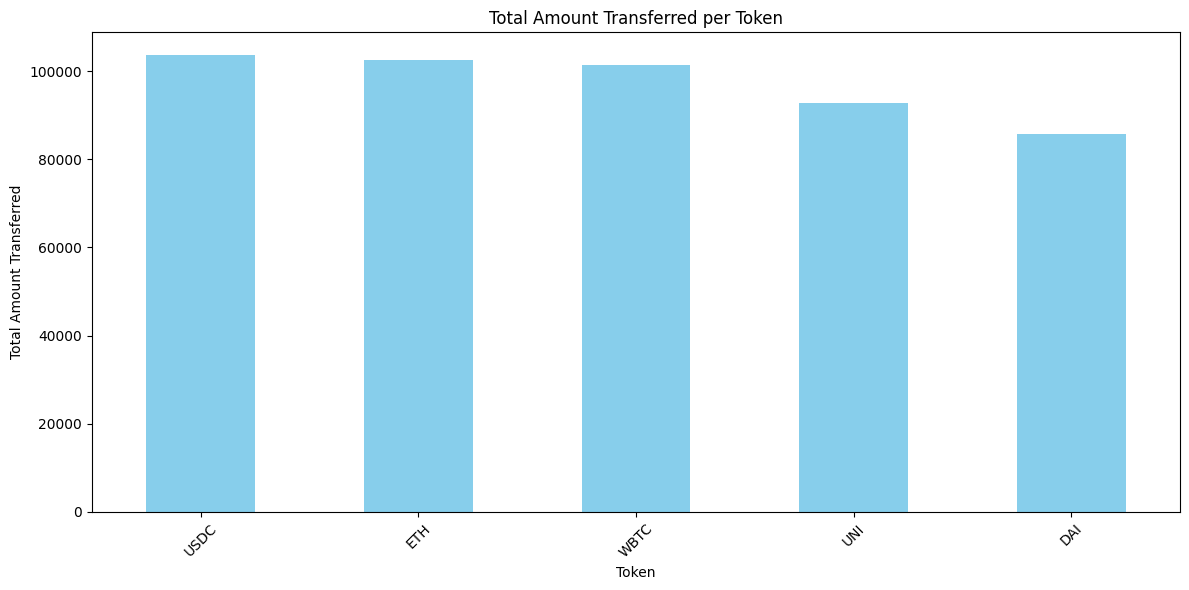

In [27]:
# plots a bar chart showing total amount transferred per token using matplotlib
import matplotlib.pyplot as plt

tx_volume_tokens.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Total Amount Transferred per Token')
plt.xlabel('Token')
plt.ylabel('Total Amount Transferred')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  